# Choosing a Dataset
For the purposes of this project, I examined the Titanic dataset available from Kaggle.com. The dataset included personal information about surviviors and deceased from the Titanic tragedy, and can play an import role in determiningwhat factors led to survival, and which did not.



# Choosing some questions 

As mentioned, I am curious as to whether or not some specific factors influenced the survival rate of passengers via the Titanic. Notably, I would like to look at whether or not sex, fare paid, and age had an affect on the survival outcome of passengers overall. Also, I would like to look at all the children aboard and determine whether their ages, when viewed in isolation, was highly-correlated with survival.

**Question 1: What is the correlation between sex and survival?**

**Question 2: What is the correlation between fare paid and survival?**

**Question 3: What is the correlation between age and survivial?**

**Question 4: What is the correlation between age (for children) and survival?**

Additionally, I would like to examine some basic descriptive statistics to get a stronger glimpse into the dataset,

**Question 5: Who is the oldest survivor, youngest survivor, oldest deceased, and youngest deceased?**

Also, I am curious about the age of certain classes on board. Is there a stark age difference between rich and poor
aboard the Titanic?

**Question 6: What is the mean age per class aboard the titanic? **

**Question 7: What is the survival percentage, based on this data, if you are a female, and what is the survival percentage if you are a male?**

# Importing Packages & Data
I am importing numpy, matplotlib, pandas, and seaborn at the beginning stages for use in the doc. Also, I will be adding the titanic data in as the variable 'titanic_data

In [341]:

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
%matplotlib inline
titanic_data = pd.read_csv('/Users/andrewteixeira/Documents/IntroToProgrammingNanoDegree/ExtraCurricular/DataAnalysis/final_project/titanic_data.csv')

# Examining the data at a high level
By taking a look at the first 3 rows of the the DataFrame, I can get a look into what each row and column represent
and how I may go about analyzing them

In [342]:
print (titanic_data.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


# Cleaning the data
We will use the .isnull().sum() function in order to determine how many rows contain missing values in the table

In [343]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Cleaning the Data: Making neccessary changes
Overall, the dataset is not missing many values we would like to investigate. We are missing 177 values for age, which may alter the data significantly as we evaluate the correlation between age and survival. We will have to remove those rows before calculation. 

**Removing AGE missing values**: We will tackle this later in the section when we come to the portion of evaluating age and survival. We will NOT remove the rows in which 'AGE' has a missing value until later on, as we will want a full dataset for other areas in which no data is missing (I.E. survived, Pclass etc.) 

**We will use the .dropna(axis=0) function in an altered dataframe (age_survived) that just includes just the age and survival column.**

## Cleaning the Data: Removing unneccessary columns
Given the questions we would like to answer don't relate to the Cabin, Embarked, Ticket, Parch, and Sibsp columns - we will alter the titanic_data by selecting only the columns we care about at the START of the analysis

In [344]:
titanic_data = titanic_data[['PassengerId','Survived','Pclass', 'Name', 'Sex', 'Age', 'Fare']]

In [345]:
#Checking for missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Fare             0
dtype: int64

**In the above, we can see that there are still 177 missing values in the age column, we do not want to remove those rows entirely, as those rows have datapoints for the other variables we would like to examine. Thus, we will remove the missing values for 'Age' when examining the correlation between age and survival later on using titanic_data.dropna(axis=0)**

# Descriptive Statistics of Titanic Data for high-level look at the dataframe 

By using the .describe funciton on the entire Dataframe, I can take a look at some of the cumulative measures
of the data columns. Through this, I have learned that 891 total passengers are included in this data. Already, with a 
mean value of 0.38, I know more people in this data set died than survived.

In [346]:
print (titanic_data.describe())

       PassengerId    Survived      Pclass         Age        Fare
count   891.000000  891.000000  891.000000  714.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118   32.204208
std     257.353842    0.486592    0.836071   14.526497   49.693429
min       1.000000    0.000000    1.000000    0.420000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    7.910400
50%     446.000000    0.000000    3.000000   28.000000   14.454200
75%     668.500000    1.000000    3.000000   38.000000   31.000000
max     891.000000    1.000000    3.000000   80.000000  512.329200


## Documentation Usage

For all the upcoming correlation analysis, I looked up and applied pandas documentation found here https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html '''


# Answering the Question: What is the correlation between age and survivial?
Would like to determine whether Age was correlated with survival. NOTE: 
''' For the set_index function, I found this resource on Stackoverflow: https://stackoverflow.com/questions/38542419/could-pandas-use-column-as-index'''

## Data Wrangling & Cleaning: 
To determine the relationship between age and survived, I will create a new dataframe with only the age, fare, and passengerId. I will then further clean the dataframe by setting the index to PassengerId for easy viewing.

In [347]:
#Alter the DataFrame to include just the age and survived columns, with the index of Passenger ID
age_survived = titanic_data[['Age', 'Survived','PassengerId']]
age_survived.set_index('PassengerId', inplace = True)
print (len(age_survived))
age_survived = age_survived.dropna(axis=0)
print(len(age_survived))

891
714


**In the above we removed the 177 missing values from AGE using the dropna function**

In [348]:
#Printing age_survived to examine the data
print (age_survived.head())

              Age  Survived
PassengerId                
1            22.0         0
2            38.0         1
3            26.0         1
4            35.0         1
5            35.0         0


In [349]:
#Check the correlation between Age and Survival
age_survived.corr(method='pearson')

,Age,Survived
Age,1.000000,-0.077221
Survived,-0.077221,1.000000


**Age had very little to no correlation with survival. ** So, I have learned that how old you are did not correlate
with survival, but perhaps there is gaps in this. 
I would like to examine just ages of children to see if age is correlated with survival if the passenger was a child

# Answering the Question: What is the correlation between age (for children) and survival?

## Data Wrangling & Cleaning: 
To determine the relationship between childs age and survival, I further cleaned the age_survived dataframe by indicating that I would only like to include rows in which the 'Age' column value was under 18. 

In [350]:
age_survived_children = age_survived[age_survived['Age'] <18]
#New variable above creates new DF where only passengers under age of 18 are included 

In [351]:
#print age_survived_children to examine the data
print (age_survived_children.head())

              Age  Survived
PassengerId                
8             2.0         0
10           14.0         1
11            4.0         1
15           14.0         0
17            2.0         0


In [352]:
#There were 113 kids under the age of 18 on in the data
print (len(age_survived_children))
print (age_survived_children.corr(method='pearson'))

113
               Age  Survived
Age       1.000000 -0.208059
Survived -0.208059  1.000000


**Correlation is higher on survival if you are a child 
rather than examining in totality, though still is low correlation. Would like to explore this further.**

Perhaps by looking at the mean age for children who died vs children who survived, I can gain some
understanding to survival based on childrens ages, especially if the data show the means 
are substanitally apart.

In [353]:
mean_child_death= (age_survived_children[age_survived_children['Survived'] == 0].mean())
mean_child_survive = (age_survived_children[age_survived_children['Survived'] == 1].mean())

In [354]:
print ("The average age of a child who died on the Titanic was " + str(mean_child_death['Age']))
print ("The average age of a child who survived on the Titanic was " + str(mean_child_survive['Age']))

The average age of a child who died on the Titanic was 10.3942307692
The average age of a child who survived on the Titanic was 7.88803278689


**This data shows that older children did not survive as much as young children, which may explain the difference in correlation.**

Now that we have explored child data, we can easily explore adult data.

## Data Wrangling & Cleaning: 
To determine the relationship between adult age and survived, I will similarly alter the age_survived Dataframe to only include rows in which the 'Age' column was greater than 18. 

In [355]:

#There were 601 passengers in this data set over the age of 18 on in the data
age_survived_adults = age_survived[age_survived['Age'] >= 18]
print (len(age_survived_adults))
print (age_survived_adults.corr(method='pearson'))

601
               Age  Survived
Age       1.000000  0.013493
Survived  0.013493  1.000000


There were 601 passengers in this data set over the age of 18 on in the data.

**Age of adults has almost no correlation to whether you survived or not.** This to me was a surprise, as
I would have guessed older individuals would have substantially deceased at a greater rate.

# Answering the Question: What is the correlation between fare paid and survival?

## Discover how many fares were on the ship, what was the max fare, and who paid the max fare
I would like to know how many different fares were paid as we are about to try and answer the question:
**What is the correlation between fare paid and survival?**


In [356]:
print (len(titanic_data['Fare'].unique()))
print (titanic_data['Fare'].max())
print (titanic_data[titanic_data['Fare'] == [titanic_data['Fare'].max()]])
print (titanic_data['Fare'].min())
print (titanic_data[titanic_data['Fare'] == [titanic_data['Fare'].min()]])

248
512.3292
     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age      Fare  
258  female  35.0  512.3292  
679    male  36.0  512.3292  
737    male  35.0  512.3292  
0.0
     PassengerId  Survived  Pclass                              Name   Sex  \
179          180         0       3               Leonard, Mr. Lionel  male   
263          264         0       1             Harrison, Mr. William  male   
271          272         1       3      Tornquist, Mr. William Henry  male   
277          278         0       2       Parkes, Mr. Francis "Frank"  male   
302          303         0       3   Johnson, Mr. William Cahoone Jr  male   
413          414         0       2    Cunningham, Mr. Alfred Fleming  male   
466          467    


**Here, we have learned that 3 people paid the maximum fare of 512.3292, and 15 people paid the minimum fare of 0.0, perhaps 
they were employees. Already, I can see that all of the people who paid 512 survived, while 14 out of 15 who paid 0.0
perished.**

## Data Wrangling: 
To determine the relationship between fare and survived, I will create a new dataframe with only the survived, fare, and pasengerId. I will then further clean the dataframe by setting the index to PassengerId, then sorting the values by 'Fare' to examine similar fares paid side by side.

In [357]:
#Creating a new variable, fare_survived, that will be used to examine the relationship between Fare and survival 
fare_survived = titanic_data[['Survived','Fare','PassengerId']]
fare_survived.set_index('PassengerId')
fare_survived_sorted = fare_survived.sort_values('Fare', ascending = True)

In [358]:
#Examine the data, print out the number of deceased by substracting the number of survived.
print (fare_survived_sorted.head(15))
print (fare_survived['Survived'].sum())
print (len(fare_survived['Survived']) - fare_survived['Survived'].sum())

     Survived  Fare  PassengerId
271         1   0.0          272
597         0   0.0          598
302         0   0.0          303
633         0   0.0          634
277         0   0.0          278
413         0   0.0          414
674         0   0.0          675
263         0   0.0          264
466         0   0.0          467
732         0   0.0          733
179         0   0.0          180
806         0   0.0          807
481         0   0.0          482
822         0   0.0          823
815         0   0.0          816
342
549


**342 people in this data survived, 549 perished**

In [359]:
#Find the average fare paid
mean_fare = fare_survived.mean(axis=0)

In [360]:
print (mean_fare)

Survived         0.383838
Fare            32.204208
PassengerId    446.000000
dtype: float64


**Remembering the data from before, those $512 fare purchasers were well above the average fare paid.
Would like to check how many standard deviations those purchasers were from the mean**

In [361]:
#Standardizing data to discover how fair away certain customers are from the mean average
def standardize(x):
    standardized_column = (x - x.mean()) / (x.std(ddof=0))
    return standardized_column


In [362]:
#Standardizing the fare_survived column
standardized_fare_survived = fare_survived.apply(standardize,axis=0)

In [363]:
#Sort the new standardized_fare_survived column 
standardized_fare_survived_sorted = standardized_fare_survived.sort_values('Fare', ascending = False)

In [364]:
print (standardized_fare_survived_sorted.head(3))

     Survived      Fare  PassengerId
258   1.26699  9.667167    -0.727034
737   1.26699  9.667167     1.135262
679   1.26699  9.667167     0.909765


If you remember, there were 3 total passengers who paid the max fare, now we can see
that these folks paid more than 9.5 standard deviations away from the mean fare! **Wow!**

In [365]:
#Run correlation function to determine whether fare and survivial are correlated
print (fare_survived.corr(method='pearson'))

             Survived      Fare  PassengerId
Survived     1.000000  0.257307    -0.005007
Fare         0.257307  1.000000     0.012658
PassengerId -0.005007  0.012658     1.000000



Surprisingly, despite all 3 max payers who survived and 14 out of 15 min payers deceased, Fare has little 
correlation with survival. 

Let's plot the fares of all who survived vs all those who deceased to see if these max payers are outliers

## Data Wrangling & Cleaning: 
I created a new dataframe, survived_fare, in which only passengerId, Fare, and Survived are included. I set the index to the dataframe to PassengerId for easy viewing. 

Then, I subsequently cleaned the new survived_fare dataframe by creating a variable to store only rows in which the survivor count was "1", and another variable to store the rows in which the survivor count was "0". Then, I plotted the two on the same plot to visually show any difference.

True


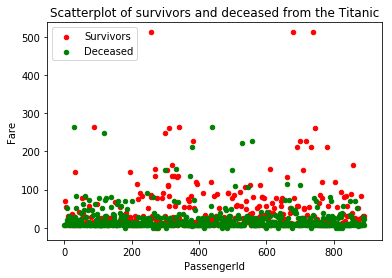

In [366]:
survived_fare = titanic_data[['PassengerId', 'Fare', 'Survived']]
survived_fare.set_index('PassengerId')
survived_fare_survivors = survived_fare[survived_fare['Survived'] == 1]
ax1 = survived_fare_survivors.plot.scatter('PassengerId', 'Fare', color='r', label='Survivors')
survived_fare_deceased = survived_fare[survived_fare['Survived'] == 0]
ax2 = survived_fare_deceased.plot.scatter('PassengerId', 'Fare',color='g', ax=ax1, label='Deceased', title = 'Scatterplot of survivors and deceased from the Titanic')
print (ax1 == ax2)


**From this inital look, the very wealthy outliers on the ship seemed to survive, but there was only a few.**

Let's now examine the role of sex in correlation with survival.

# Answering Question: What is the correlation between sex and survival?

## Data Wrangling & Cleaning: 
To determine the relationship between gender and survived, I created a new DataFrame consisting of the survived, sex, and passengerId columns from the titanic_data dataframe.

Then, I replaced 'Male' with the value 0 and 'Female' with the value 1 in order to calculate correlation, and used the .groupby .sum() method to take a quick look at the sum of survivors from each category since survived = 1 or 0

In [367]:
#Create a DataFrame of just the columns we care about
gender_survived = titanic_data[['Survived','Sex',"PassengerId"]]

In [368]:
#Examine the newly cleaned data
print (gender_survived.head())

   Survived     Sex  PassengerId
0         0    male            1
1         1  female            2
2         1  female            3
3         1  female            4
4         0    male            5


In [369]:
#Replace the value 'Female' - a string - with the value 1
female_replaced = gender_survived.replace('female',1)
print (female_replaced.head())

   Survived   Sex  PassengerId
0         0  male            1
1         1     1            2
2         1     1            3
3         1     1            4
4         0  male            5


In [370]:
#Replace the value 'Male' - a string - with the value 0
male_replaced = female_replaced.replace('male',0)
#rename male_replaced 
survived_by_sex = male_replaced

In [371]:
print (survived_by_sex.corr(method='pearson'))

             Survived       Sex  PassengerId
Survived     1.000000  0.543351    -0.005007
Sex          0.543351  1.000000    -0.042939
PassengerId -0.005007 -0.042939     1.000000


**Sex has a high correlation with survival. MUCH higher than presence of children/parent, age, 
or fare paid.**

        Survivors
Sex              
Male          109
Female        233


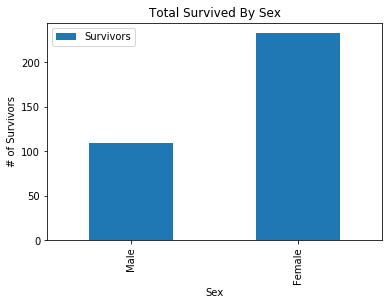

In [372]:
#Examining descriptive statistics for the sex category since sex is highly correlated with survival'''
total_survived_by_sex = survived_by_sex.groupby('Sex').sum()
total_survived_by_sex = total_survived_by_sex['Survived']
male_survived = total_survived_by_sex.loc[0]
female_survived = total_survived_by_sex.loc[1]
total_survived_by_sex = np.array(total_survived_by_sex.loc[0:1])
total_survived_by_sex = pd.DataFrame(total_survived_by_sex)
total_survived_by_sex['Sex'] = ['Male','Female']
total_survived_by_sex = total_survived_by_sex.rename(columns = {0:'Survivors'})
total_survived_by_sex = total_survived_by_sex.set_index('Sex')
print (total_survived_by_sex)
total_survived_sex_plot = total_survived_by_sex.plot(kind='bar', title='Total Survived By Sex')
total_survived_sex_plot.set_ylabel('# of Survivors')




**The above bar graph depcits the total survived by sex for males and females. A stark contrast in the two bars shows a much greater number of female survivors are present in the data. **

Also, I found documentation to add labels to yaxis: https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot

# Answering the Question: What is the survival percentage, based on this data, if you are a female, and what is the survival percentage if you are a male?

## Data Wrangling & Cleaning: 
In this section, I renamed the DataFrame for percentages as a nparray to rename the columns and index for eventual plotting, then reverted back to Pandas DataFrame before plotting. 



In [373]:
#Find the total deceased by sex for analysis of the survival percentage
def find_total_passengers_by_sex(value):
    passengers = len(survived_by_sex[survived_by_sex['Sex'] == value])
    return passengers

female_passengers = find_total_passengers_by_sex([0])
male_passengers = find_total_passengers_by_sex([1])

def percentage(value1,value2):
    return value1 / value2

male_survival_percentage = (percentage(male_survived,male_passengers))
female_survival_percentage = (percentage(female_survived,female_passengers))
print (male_survival_percentage)
print (female_survival_percentage)

0.347133757962
0.403812824957


In [374]:
survival_percentages = np.array([male_survival_percentage,female_survival_percentage])
print (survival_percentages)

[ 0.34713376  0.40381282]


In [375]:
survival_percentages_df = pd.DataFrame(survival_percentages)
print (survival_percentages_df)
survival_percentages_df['Sex'] = ['Male','Female']
survival_percentages_df=survival_percentages_df.rename(columns = {0:'Percent'})
percent_survived_indexed = survival_percentages_df.set_index('Sex')
print (percent_survived_indexed)

          0
0  0.347134
1  0.403813
         Percent
Sex             
Male    0.347134
Female  0.403813


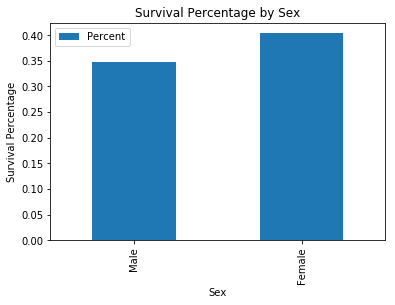

In [376]:
percent_survived_plot = percent_survived_indexed.plot(kind='bar', title = 'Survival Percentage by Sex',)
percent_survived_plot.set_ylabel('Survival Percentage')

**The above barchat depicts the survival percentage by sex, showing that women, on average, have a greater percentage of survival than their male counterparts.**

Would now like to begin examining the relationship between the variables of class and age to determine how age differed within the various passenger classes

## Data Wrangling & Cleaning: 
To determine the relationship between age and class, I will create a new dataframe with only the Pclass and Age columns, then sort the data by PClass to examine the various classes alongside values within them, subsequently setting the index to Pclass in order to examine that further and using dropna.() function to remove NaN from the age category

In [377]:
#Create a new variable of just class and age.
class_age = titanic_data[['Pclass','Age']]

In [378]:
#Sort the table values according to descending Plasse
class_age_sort = class_age.sort_values('Pclass',ascending = True)

In [379]:
#Set the index of the table to Pclass.
class_age_sort = class_age_sort.set_index('Pclass')
#Clean the data to remove rows that have NaN in the age column
class_age_sort.dropna(axis=0)

,Age
Pclass,
1,4.00
1,24.00
1,30.00
1,17.00
1,0.92
1,24.00
1,18.00
1,48.00
1,2.00


In [380]:
print (class_age_sort.corr(method='pearson'))
#Your age has a medium correlation with what class you are.

     Age
Age  1.0


# Answering the Question: What is the mean age per class aboard the titanic?

## Data Wrangling & Cleaning: 
Grouped the previously created class_age_sort dataframe by class age.mean() in order to easily see the various mean ages for different classes.

In [381]:
#Group the values to the mean figure of all Pclass age by class
mean_age_by_class = class_age_sort.groupby('Pclass').mean()
print (mean_age_by_class)

              Age
Pclass           
1       38.233441
2       29.877630
3       25.140620


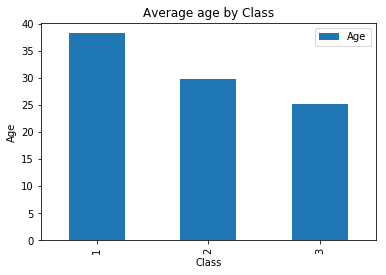

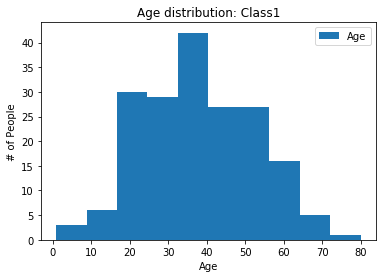

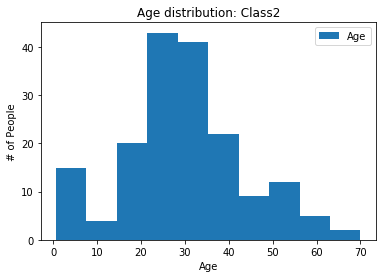

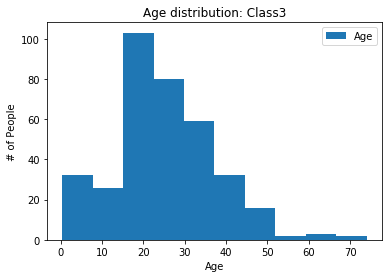

In [382]:
plot_mean_age = mean_age_by_class.plot.bar(title = 'Average age by Class')
plot_mean_age.set_xlabel('Class')
plot_mean_age.set_ylabel('Age')
class1 = class_age_sort.loc[1]
class2 = class_age_sort.loc[2]
class3 = class_age_sort.loc[3]
class1_plot = class1.plot.hist(title = 'Age distribution: Class1')
class1_plot.set_xlabel('Age')
class1_plot.set_ylabel('# of People')
class2_plot = class2.plot.hist(title = 'Age distribution: Class2')
class2_plot.set_xlabel('Age')
class2_plot.set_ylabel('# of People')
class3_plot = class3.plot.hist(title = 'Age distribution: Class3')
class3_plot.set_xlabel('Age')
class3_plot.set_ylabel('# of People')

** '''1st class passengers are, on average, older than the other passengers'''** This answers the following question: Question 6: What is the mean age per class aboard the titanic? Also, examining the data through histograms of age by class, we can see stronger distribution near the 40 year old mark in the first class data, while 2nd class and 3rd class Histograms do not.

# Answering the Question: Who is the oldest survivor, youngest survivor, oldest deceased, and youngest deceased?

## Data Wrangling & Cleaning: 
Used the previously created age_survived DataFrame to find the .max() and .min() figures from rows who survived or died on the Titanic. Then, used the loc function to find the names of those individuals.

In [383]:
#Find the oldest survivor, oldest deceased, youngest survivor, youngest deceased. 
print (age_survived[age_survived['Survived'] == 0].max()) #Oldest deceased was 74
print (age_survived[age_survived['Survived'] == 1].max()) #Oldest survived was 80
print (age_survived[age_survived['Survived'] == 0].min()) #Youngest decased was 1
print (age_survived[age_survived['Survived'] == 1].min()) #Youngest survivor was .42

Age         74.0
Survived     0.0
dtype: float64
Age         80.0
Survived     1.0
dtype: float64
Age         1.0
Survived    0.0
dtype: float64
Age         0.42
Survived    1.00
dtype: float64


In [384]:
#Finding out who represents the oldest and youngest survivor and oldest and youngest deceased
print (titanic_data.loc[titanic_data['Age'] == 80.0]['Name'])
print (titanic_data.loc[titanic_data['Age'] == 74.0]['Name'])
print (titanic_data.loc[titanic_data['Age'] == 1.0]['Name'])
print (titanic_data.loc[titanic_data['Age'] == 0.42]['Name'])

630    Barkworth, Mr. Algernon Henry Wilson
Name: Name, dtype: object
851    Svensson, Mr. Johan
Name: Name, dtype: object
164       Panula, Master. Eino Viljami
172       Johnson, Miss. Eleanor Ileen
183          Becker, Master. Richard F
381        Nakid, Miss. Maria ("Mary")
386    Goodwin, Master. Sidney Leonard
788         Dean, Master. Bertram Vere
827              Mallet, Master. Andre
Name: Name, dtype: object
803    Thomas, Master. Assad Alexander
Name: Name, dtype: object


**The above printout shows the oldest/youngest passengers who survived and who died on the Titanic. NOTE: 7 children make up the youngest passengers who died, as they all share the same age of 1.0 **


# Conclusion: 

**Question 1: What is the correlation between sex and survival?**
I sought to figure out a few characteristics and determinants of survival aboard the Titanic. 
After analysis, I have determined that Sex was a characteristic 
highly correlated with survival (correlation = 0.543351). 
If you were a woman, you survived at a higher rate as well than if you were male.

**Question 2: What is the correlation between fare paid and survival? **
Fare paid also had very little correlation with survival. At the inital glance, the 3 individuals who paid
the maximum fare all survived, while 14 out of 15 passengers who paid the minimum fare perished. I would have
guessed this would have resulted in higher correlation between fare and survival, but this was not the case. 

A scatter plot showed that the maximum payers were true outliers in the dataset, and there expenditure and survival
were the exception to the rule aboard the titanic.

The actually correlation for fare paid and survival was 0.257307.

**Question 3: What is the correlation between age and survivial? AND**
**Question 4: What is the correlation between age (for children) and survival?**

Suprisingly, age was not highly correlated with survival (Correlation = 0.077221). I approached this analysis with the assumption
that older individuals would be highly correlated with death while younger with survival, but a Pearson
correlation showed that to be not the case.

Interestingly, for children, the correlation was stronger with survival (0.208059) than viewing age in its totality.

**Question 5: Who is the oldest survivor, youngest survivor, oldest deceased, and youngest deceased?**
I wanted to know more about the survivors and those perished, notably, who was the oldest and youngest survivor, 
and who were the oldest and youngest who perished. After extracting names, I sadly learned that the youngest
age of death was 1 years old aboard the Titanic, and tragically, 7 children fit that age. 


Oldest Survived: Barkworth, Mr. Algernon Henry Wilson - 80
Oldest Deceased: Svensson, Mr. Johan, 74

Youngest Deceased (1 years old): 
Panula, Master. Eino Viljami
Johnson, Miss. Eleanor Ileen
Becker, Master. Richard F
Nakid, Miss. Maria ("Mary")
Goodwin, Master. Sidney Leonard
Dean, Master. Bertram Vere
Mallet, Master. Andre

Youngest Survived: 
Thomas, Master. Assad Alexander: .42
**Question 6: What is the mean age per class aboard the titanic?**
I also wanted to examine the relationship between age and class. It turns out that the average age of a 1st class
passenger was approximately 13 years older than that of the 3rd class passenger, logical when you consider 
wealth accumulation takes time. The first class passenger mean age was 38.233441, second class was 29.877630, and 
third class was 25.140620.

**Question 7: What is the survival percentage, based on this data, if you are a female, and what is the survival percentage**
if you are a male. 
The survival percentage for a male is just over 34%, while the survival percentage for a female is more than 40%.


**Limitations to the analysis:** Firstly, the dataset does not contain all the information regarding every 
passenger that was on the Titanic. In fact, when looking at sex, we saw that the data heavily skews towards
female passengers than male passengers, both in totality and in survivors and number deceased. Though we
found sex to be highly-correlated with survival, this may not be the case should the researcher have had
access to the entirety of the data. Thus, the survival percentage also calcuated based on sex is without
question limited in its scope. 